In [ ]:
# print working directory
!pwd

# List files and folders
!ls

# Check the open jdk version on colab
!ls /usr/lib/jvm/
     

/content
sample_data
default-java  java-1.11.0-openjdk-amd64  java-11-openjdk-amd64


In [ ]:


# Download and install Java 8
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:2 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:13 http://ppa.launchpad.net/c2d4u.team/c2d4u4

In [ ]:

# Check if we have java 8 or not
!ls /usr/lib/jvm/

default-java		   java-11-openjdk-amd64     java-8-openjdk-amd64
java-1.11.0-openjdk-amd64  java-1.8.0-openjdk-amd64


In [ ]:
# Download Apache Spark binary: This link can change based on the version. Update this link with the latest version before using
!wget -q https://downloads.apache.org/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

# Unzip file
!tar -xvzf spark-3.2.3-bin-hadoop3.2.tgz

spark-3.2.3-bin-hadoop3.2/
spark-3.2.3-bin-hadoop3.2/LICENSE
spark-3.2.3-bin-hadoop3.2/NOTICE
spark-3.2.3-bin-hadoop3.2/R/
spark-3.2.3-bin-hadoop3.2/R/lib/
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/DESCRIPTION
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/INDEX
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/Meta/
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/Meta/Rd.rds
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/Meta/features.rds
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/Meta/links.rds
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/Meta/package.rds
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/Meta/vignette.rds
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/NAMESPACE
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/R/SparkR
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdb
spark-3.2.3-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdx
spark-3.2.3-bin-hadoop3.2/R/lib/Sp

In [ ]:

# Install findspark: Adds Pyspark to sys.path at runtime
!pip install -q findspark

# Install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 19.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=cea54b49b0d28921bca9fd5cf22223a43200d1be6b6cd0367da7543899c0ebf6
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master("local") \
        .appName("Hands-on PySpark on Google Colab") \
        .getOrCreate()

In [ ]:
spark

In [ ]:
spark.sparkContext

<SparkContext master=local appName=Hands-on PySpark on Google Colab>

In [ ]:
# Load data
spark_data = spark.read.format('csv').load("/content/sample_data/california_housing_train.csv")

In [ ]:

# Print the top 5 rows using .show() function
spark_data.show(10, truncate=False)

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|_c0        |_c1      |_c2               |_c3        |_c4           |_c5        |_c6        |_c7          |_c8               |
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|longitude  |latitude |housing_median_age|total_rooms|total_bedrooms|population |households |median_income|median_house_value|
|-114.310000|34.190000|15.000000         |5612.000000|1283.000000   |1015.000000|472.000000 |1.493600     |66900.000000      |
|-114.470000|34.400000|19.000000         |7650.000000|1901.000000   |1129.000000|463.000000 |1.820000     |80100.000000      |
|-114.560000|33.690000|17.000000         |720.000000 |174.000000    |333.000000 |117.000000 |1.650900     |85700.000000      |
|-114.570000|33.640000|14.000000         |1501.000000|337.000000    |515.000000 |226.000000 |3.191700     |7340

In [ ]:
!pip install s3fs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.5 MB/s eta 0:00:00


In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 10.3 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.27.59
    Uninstalling botocore-1.27.59:
      Successfully uninstalled botocore-1.27.59
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.4.2 requires botocore<1.27.60,>=1.27.59, but you have botocore 1.29.90 which is incompatible.


In [ ]:
import boto3

In [ ]:
client = boto3.client('s3')

In [ ]:
path = 'https://mandartesting.s3.amazonaws.com/farmitra.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(path)
df.head()

,Unnamed: 0,N,P,K,temperature,humidity,ph,rainfall,label
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,87,44,40,19.443986,81.794664,5.958209,174.693843,rice
2,2,88,45,43,20.441165,81.324861,6.232690,218.079073,rice
3,3,90,41,41,19.959130,81.750387,6.991755,171.576057,rice
4,4,92,42,42,19.833928,81.160192,7.036952,167.894497,rice


In [ ]:

sparkDF=spark.createDataFrame(df) 
sparkDF.printSchema()
sparkDF.show()


root
 |-- Unnamed: 0: long (nullable = true)
 |-- N: long (nullable = true)
 |-- P: long (nullable = true)
 |-- K: long (nullable = true)
 |-- temperature: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- ph: double (nullable = true)
 |-- rainfall: double (nullable = true)
 |-- label: string (nullable = true)

+----------+---+---+---+------------------+-----------------+-----------------+------------------+-----+
|Unnamed: 0|  N|  P|  K|       temperature|         humidity|               ph|          rainfall|label|
+----------+---+---+---+------------------+-----------------+-----------------+------------------+-----+
|         0| 90| 42| 43|       20.87974371|      82.00274423|6.502985292000001|       202.9355362| rice|
|         1| 87| 44| 40|  19.4439856817146|81.79466414425193|5.958209432062896|174.69384331020302| rice|
|         2| 88| 45| 43| 20.44116524971613|81.32486107588045|6.232690084974857|218.07907286560643| rice|
|         3| 90| 41| 41|19.9591298678

In [ ]:
sparkDF = sparkDF.drop("Unnamed: 0")

# display the new DataFrame
sparkDF.show()

+---+---+---+------------------+-----------------+-----------------+------------------+-----+
|  N|  P|  K|       temperature|         humidity|               ph|          rainfall|label|
+---+---+---+------------------+-----------------+-----------------+------------------+-----+
| 90| 42| 43|       20.87974371|      82.00274423|6.502985292000001|       202.9355362| rice|
| 87| 44| 40|  19.4439856817146|81.79466414425193|5.958209432062896|174.69384331020302| rice|
| 88| 45| 43| 20.44116524971613|81.32486107588045|6.232690084974857|218.07907286560643| rice|
| 90| 41| 41|19.959129867813274|81.75038666328243|6.991754617761783|171.57605703181414| rice|
| 92| 42| 42|19.833928419954848|81.16019155312232|7.036952109547523|167.89449688326482| rice|
| 88| 45| 46| 20.85529908602416|82.35999951414037|7.203597551582385| 155.1775261588173| rice|
| 91| 40| 40|19.035476677854543|81.66540913583428|6.342707279809168|160.81173888123377| rice|
| 92| 39| 45| 22.82577477457197|82.65240317620237|5.80677114

In [ ]:
print(type(sparkDF))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
sparkDF.count()

55000

In [ ]:
# df.rename(columns={'N': 'Nitrogen', 'P': 'Phosphorous', 'K': 'Potassium'}, inplace=True)  
sparkDF = sparkDF.withColumnRenamed("N", "Nitrogen")
sparkDF = sparkDF.withColumnRenamed("P", "Phosphorous")
sparkDF = sparkDF.withColumnRenamed("K", "Potassium")

In [ ]:
sparkDF.head()

Row(Nitrogen=90, Phosphorous=42, Potassium=43, temperature=20.87974371, humidity=82.00274423, ph=6.502985292000001, rainfall=202.9355362, label='rice')

In [ ]:
unique_df = sparkDF.dropDuplicates()
if sparkDF.count() == unique_df.count():
    print("The DataFrame contains only unique rows.")
else:
    print("The DataFrame contains duplicate rows.")

The DataFrame contains only unique rows.


In [ ]:
# These are these unique labels, which act as a target variables.

In [ ]:
unique_names = sparkDF.select("label").distinct().collect()
len(unique_names)
# The Number of unique values are 22

22

In [ ]:
for i in unique_names:
  print(i.label)

chickpea
mungbean
orange
papaya
pigeonpeas
cotton
apple
mango
jute
grapes
maize
pomegranate
mothbeans
banana
coconut
muskmelon
kidneybeans
rice
coffee
blackgram
lentil
watermelon


In [ ]:
#Statistical Information about Data
sparkDF.describe()

DataFrame[summary: string, Nitrogen: string, Phosphorous: string, Potassium: string, temperature: string, humidity: string, ph: string, rainfall: string, label: string]

In [ ]:
sparkDF.printSchema()

root
 |-- Nitrogen: long (nullable = true)
 |-- Phosphorous: long (nullable = true)
 |-- Potassium: long (nullable = true)
 |-- temperature: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- ph: double (nullable = true)
 |-- rainfall: double (nullable = true)
 |-- label: string (nullable = true)



<AxesSubplot:xlabel='label', ylabel='count'>

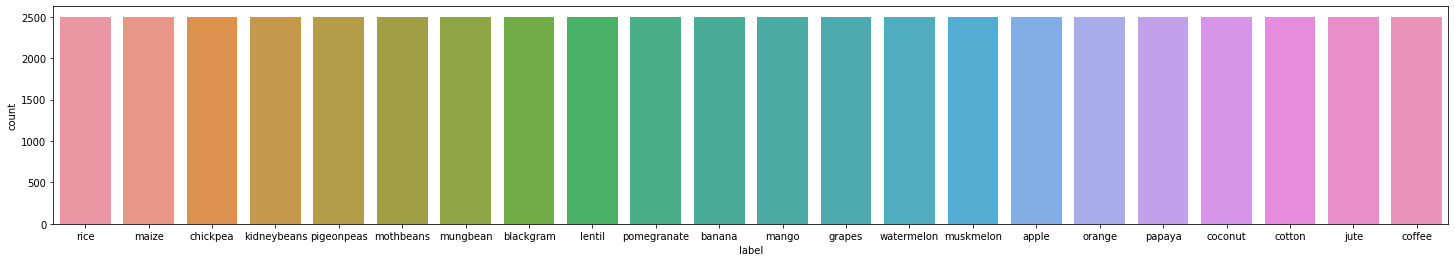

In [ ]:
df = sparkDF.toPandas()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 4))
sns.countplot(x = 'label', data = df)

<AxesSubplot:xlabel='label', ylabel='count'>

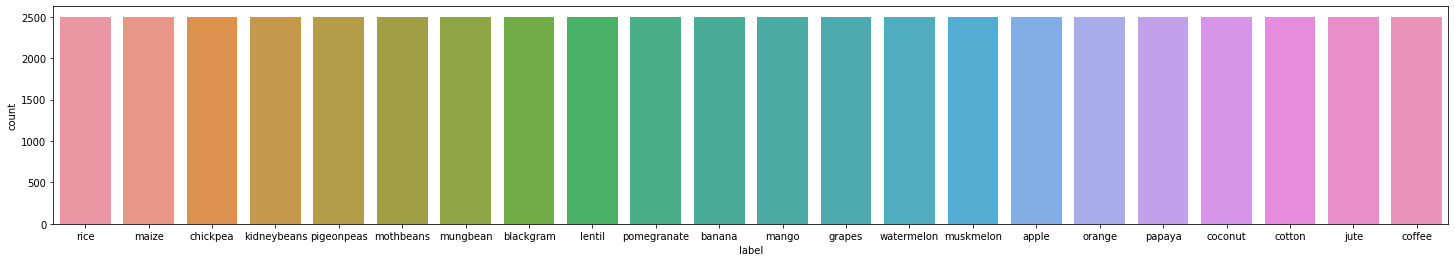

In [ ]:
import seaborn as sns
plt.figure(figsize=(25, 4))
sns.countplot(x = 'label', data = df)

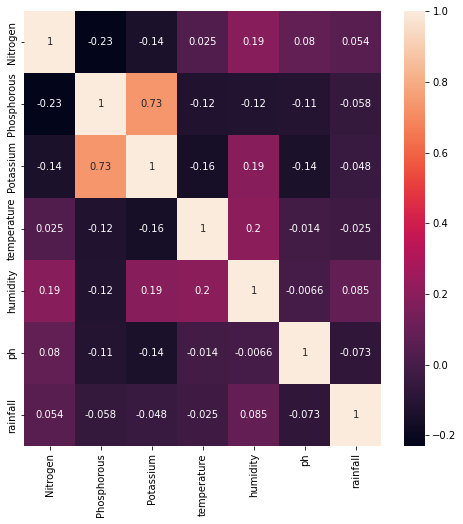

In [ ]:
#Checking for correlation
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# From the above chart we can conclude that : - 
#1) If the value of Potassium increases there is 73% chances that the values of Phosporous will increase

#2) Nitrogen & Potassium are inversely related

#3) Phosphororus & Nitrogen are inversely related

#4) Phosphorous are Potassium are directly related to each other. There is 73% chance that when Potassium increases Phosphorous also increases


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Nitrogen', ylabel='Density'>

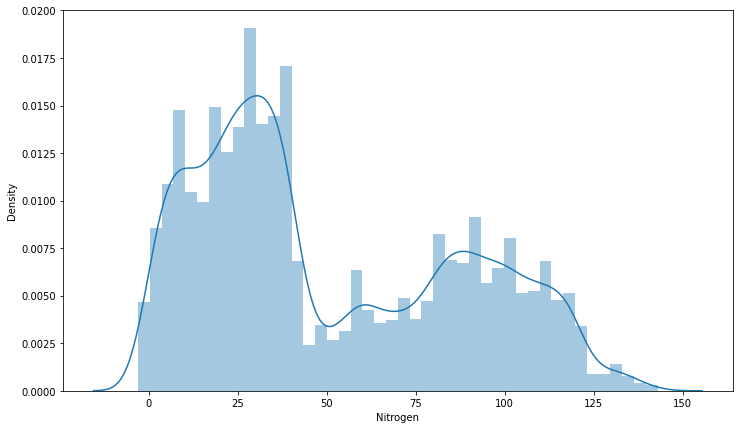

In [ ]:
plt.figure(figsize = [12,7])
sns.distplot(df['Nitrogen'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Phosphorous', ylabel='Density'>

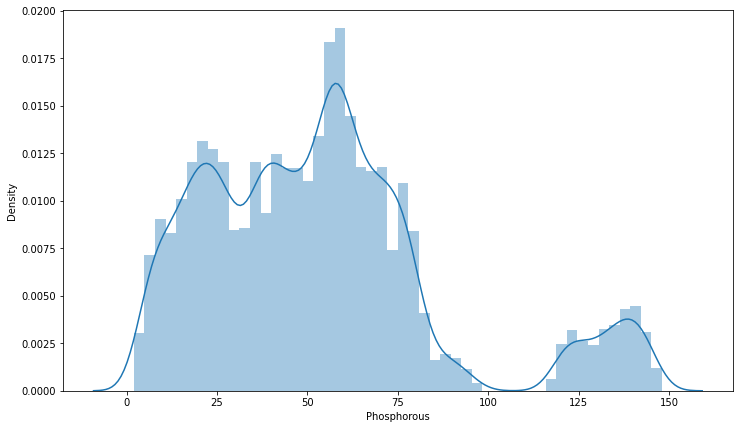

In [ ]:
plt.figure(figsize = [12,7])
sns.distplot(df['Phosphorous'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Potassium', ylabel='Density'>

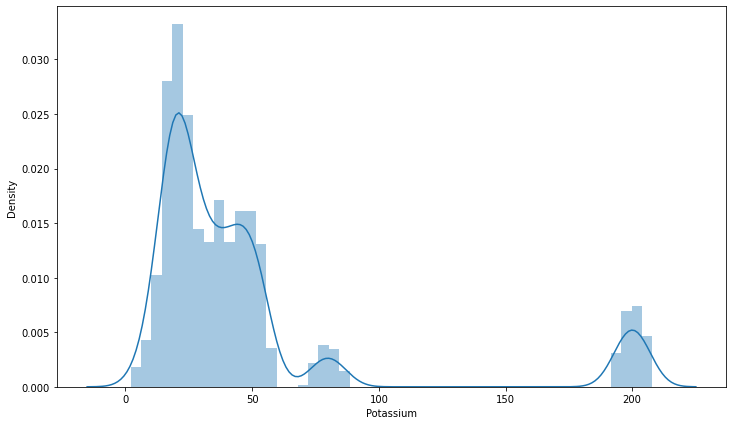

In [ ]:
plt.figure(figsize = [12,7])
sns.distplot(df['Potassium'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temperature', ylabel='Density'>

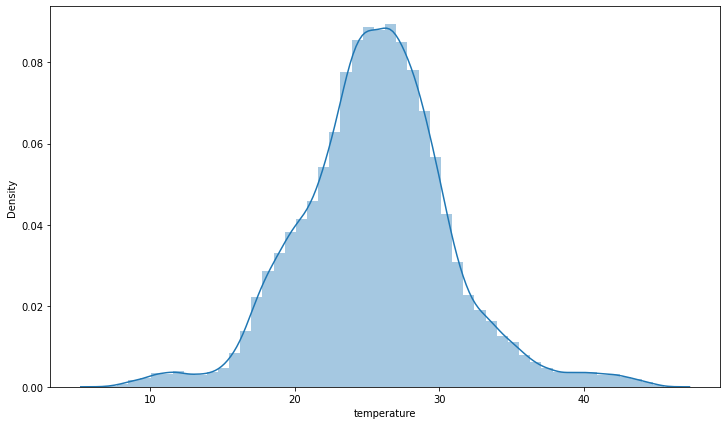

In [ ]:
plt.figure(figsize = [12,7])
sns.distplot(df['temperature'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='humidity', ylabel='Density'>

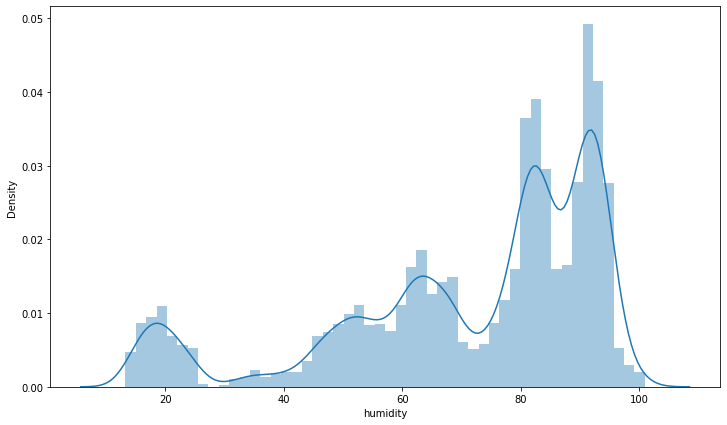

In [ ]:
plt.figure(figsize = [12,7])
sns.distplot(df['humidity'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

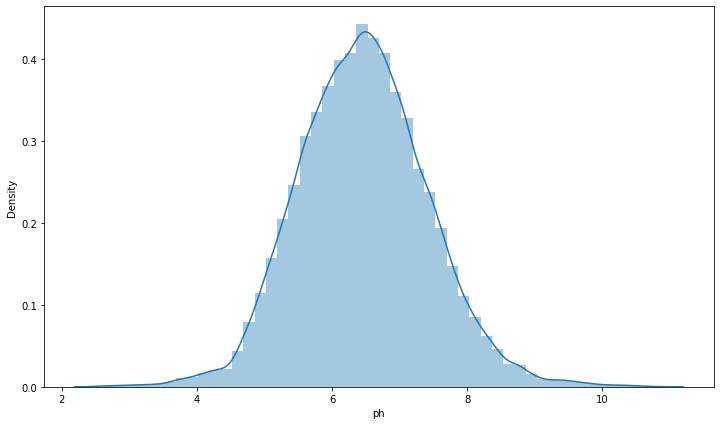

In [ ]:
plt.figure(figsize = [12,7])
sns.distplot(df['ph'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rainfall', ylabel='Density'>

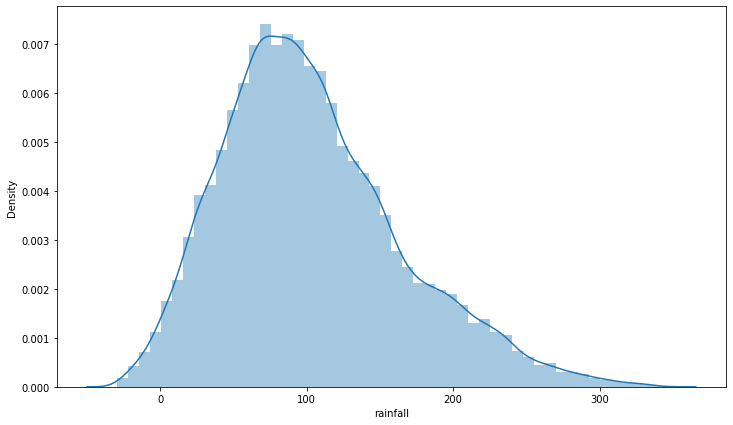

In [ ]:
plt.figure(figsize = [12,7])
sns.distplot(df['rainfall'])

In [ ]:
#Observation:
#1) The values of the Nitrogen column are highly variated

#2) The values of Phosphorous have variance

#3) The graph for Potassium shows that the data is Right skewed with outliers present at the higher side

#4) The graph for temperatures reflects that that data is left skewed with outliers on the lower side

#5) The data of Humidity is with high variance

#6)  The graph of pH values shows that the data is left skewed with outliers present on the lower side

#7) The graph for rainfall shows a normal distribution

In [ ]:
sparkDF.write.format("csv").option("header", "true").save("/content/dataset/")

In [ ]:
from google.colab import files

# download a file to your local machine
files.download('/content/dataset/part-00000-8a28cee7-7f25-4738-90c7-a719fd4cf91e-c000.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>